In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../../data/intermediate/data_concat.csv", header =0, parse_dates=["month"])

/tmp/ipykernel_3211/2452079848.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../data/intermediate/data_concat.csv", header =0, parse_dates=["month"])


In [4]:
df["year_of_sales"] = df["month"].dt.year
df["month_of_sales"] = df["month"].dt.month

In [5]:
# Desired column order
new_col_order = ['month', 'year_of_sales', 'month_of_sales', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price','remaining_lease', 'year']

In [6]:
# Reorder the columns
df = df[new_col_order]

In [7]:
df.head()

,month,year_of_sales,month_of_sales,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1990-01-01,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990
1,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,44,BENDEMEER RD,04 TO 06,63.0,STANDARD,1981,31400.0,NaN,1990
2,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,20,ST. GEORGE'S RD,04 TO 06,67.0,NEW GENERATION,1984,66500.0,NaN,1990
3,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,14,KG ARANG RD,04 TO 06,103.0,NEW GENERATION,1984,77000.0,NaN,1990
4,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,46,OWEN RD,01 TO 03,68.0,NEW GENERATION,1982,58000.0,NaN,1990


In [8]:
df["price_per_sqm"]=df.resale_price / df.floor_area_sqm

In [9]:
df.head()

,month,year_of_sales,month_of_sales,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,price_per_sqm
0,1990-01-01,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,290.322581
1,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,44,BENDEMEER RD,04 TO 06,63.0,STANDARD,1981,31400.0,NaN,1990,498.412698
2,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,20,ST. GEORGE'S RD,04 TO 06,67.0,NEW GENERATION,1984,66500.0,NaN,1990,992.537313
3,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,14,KG ARANG RD,04 TO 06,103.0,NEW GENERATION,1984,77000.0,NaN,1990,747.572816
4,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,46,OWEN RD,01 TO 03,68.0,NEW GENERATION,1982,58000.0,NaN,1990,852.941176


In [10]:
new_col_order_2 = ['month', 'year_of_sales', 'month_of_sales', 'town', 
                 'flat_type', 'block', 'street_name', 'storey_range', 
                 'floor_area_sqm', 'flat_model', 'lease_commence_date', 
                 'price_per_sqm','remaining_lease', 'year', 'resale_price']

In [11]:
# Reorder the columns
df = df[new_col_order_2]
df.head()

,month,year_of_sales,month_of_sales,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,price_per_sqm,remaining_lease,year,resale_price
0,1990-01-01,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,290.322581,NaN,1990,9000.0
1,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,44,BENDEMEER RD,04 TO 06,63.0,STANDARD,1981,498.412698,NaN,1990,31400.0
2,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,20,ST. GEORGE'S RD,04 TO 06,67.0,NEW GENERATION,1984,992.537313,NaN,1990,66500.0
3,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,14,KG ARANG RD,04 TO 06,103.0,NEW GENERATION,1984,747.572816,NaN,1990,77000.0
4,1990-01-01,1990,1,KALLANG/WHAMPOA,3 ROOM,46,OWEN RD,01 TO 03,68.0,NEW GENERATION,1982,852.941176,NaN,1990,58000.0


In [17]:
def plot_sqm_1():
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    #hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(data=df, x="town", y="price_per_sqm", kind="bar", 
                    height=5, aspect=2.5, errorbar=None)
    g.fig.suptitle("Price Per Square Meter across different town", y=1.01)   
    g.set(xlabel="Town", ylabel = "Price Per Square Meter")
    plt.xticks(rotation=90)
    #plt.ticklabel_format(style='scientific', axis='y')

<Figure size 640x480 with 0 Axes>

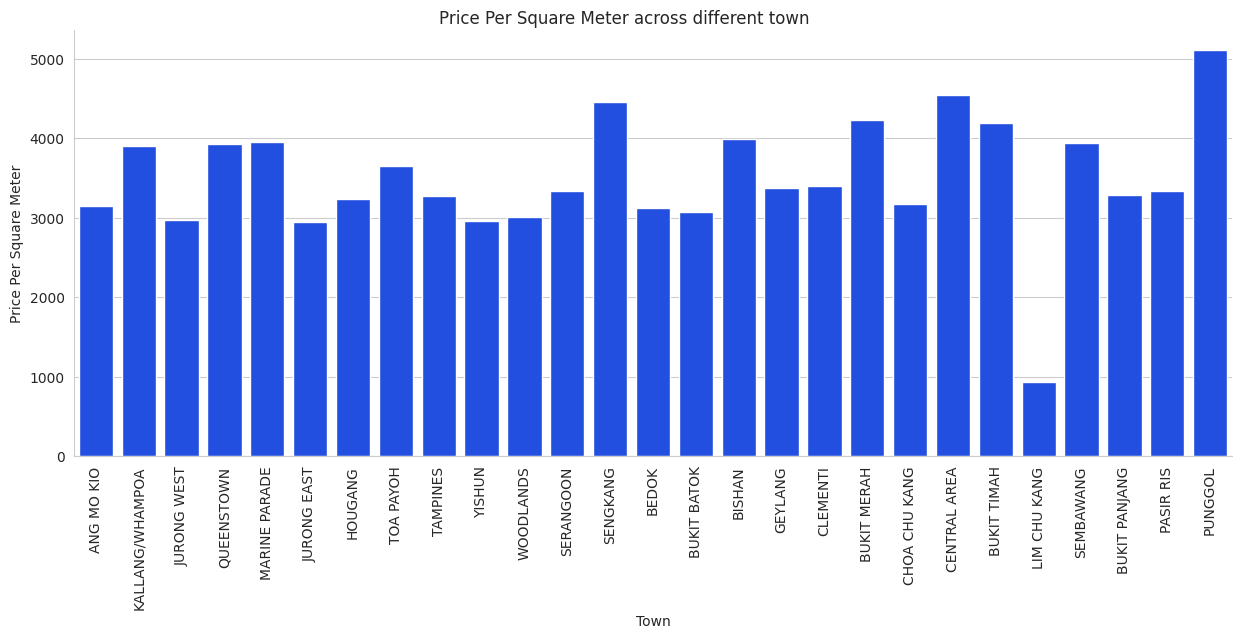

In [18]:
plt.clf()
plot_sqm_1()
plt.show()

In [49]:
def plot_sqm_2(room, twn):
    
    df_query = df.query("flat_type == @room & town == @twn")
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    #hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(data=df_query, x="town", y="price_per_sqm", kind="bar", 
                    height=5, aspect=2, errorbar=None, hue="year_of_sales", palette="bright")
    g.fig.suptitle(f"Price Per Square Meter across {twn} and flat type: {room}", y=1.01)   
    g.set(xlabel="Town", ylabel = "Price Per Square Meter")
    plt.xticks(rotation=0)
    #plt.ticklabel_format(style='scientific', axis='y')

<Figure size 640x480 with 0 Axes>

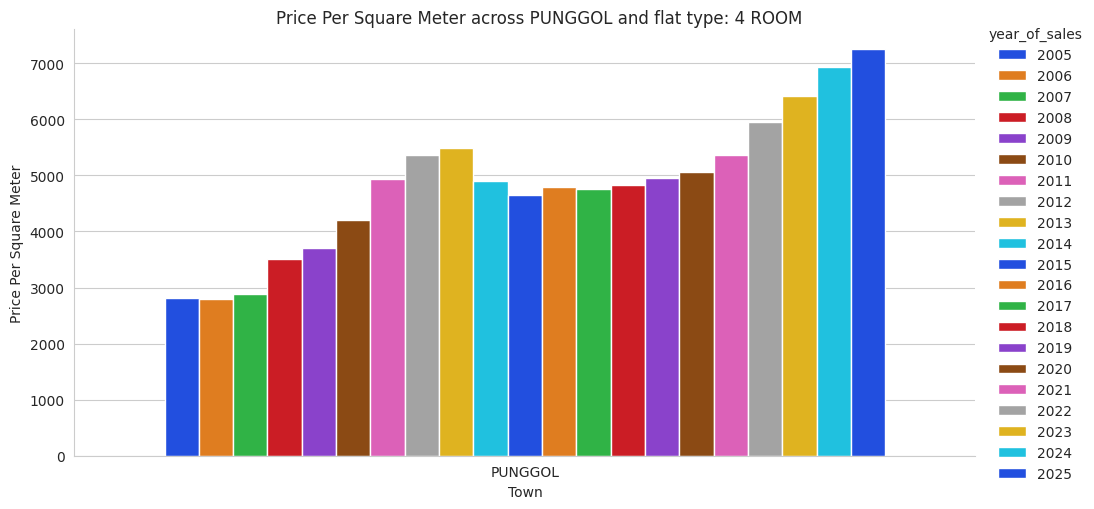

In [50]:
plt.clf()
plot_sqm_2("4 ROOM", "PUNGGOL")
plt.show()

In [38]:
def plot_sqm_3(twn):
    
    df_query = df.query("town == @twn")
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(data=df_query, x="town", y="price_per_sqm", kind="bar", 
                    height=5, aspect=1.5, errorbar=None, hue="flat_type", hue_order=hue_order, palette="bright")
    g.fig.suptitle(f"Price Per Square Meter across {twn} and all flat type", y=1.01)   
    g.set(xlabel="Town", ylabel = "Price Per Square Meter")
    plt.xticks(rotation=0)
    plt.show()
    #plt.ticklabel_format(style='scientific', axis='y')

<Figure size 640x480 with 0 Axes>

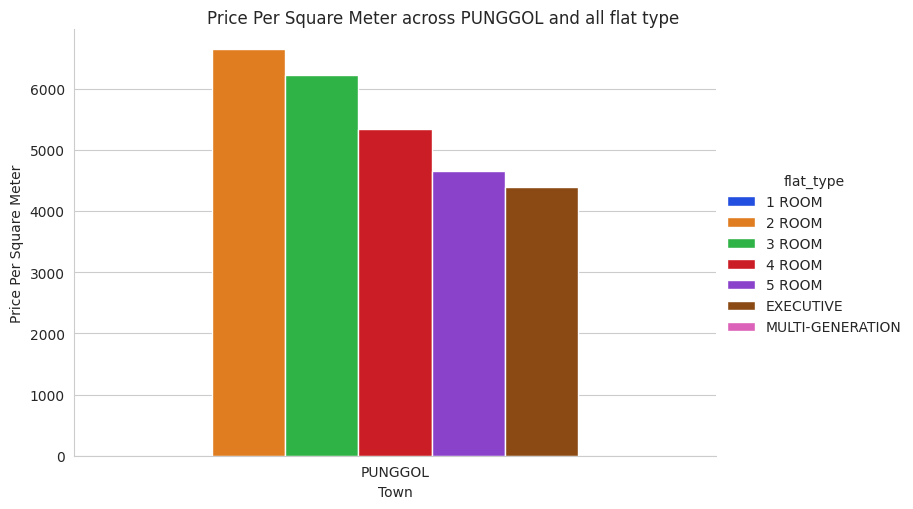

In [39]:
plt.clf()
plot_sqm_3("PUNGGOL")